# DI 6.6 - Sourcing & Analyzing Time Series Data

## This script contains the following:

### 1. Importing Libraries and Data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time-Series Analysis: decomposition
### 4. Testing for statinarity
### 5. Stationarizing the Federal Reserve Economic Data
### 6. Export

### 1. Importing Libraries and Data

In [5]:
# Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [6]:
# Configure API key

quandl.ApiConfig.api_key = 'W1Cr3NwnxyyXZs96idah'

In [7]:
# Bringing in sample data from quandl (bitcoin data  insights)

bitcoin = quandl.get_table("QDL/BCHAIN", paginate=True)

In [181]:
# Creating a Path

path = r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis'

#### Data Set I used from quandl: https://data.nasdaq.com/databases/BCHAIN

In [9]:
bitcoin.head()

,code,date,value
None,,,
0,TVTVR,2016-07-17,60.5821
1,TVTVR,2016-07-16,93.1541
2,TVTVR,2016-07-15,76.3548
3,TVTVR,2016-07-14,86.4739
4,TVTVR,2016-07-13,39.4733


In [35]:
bitcoin.shape

(169738, 3)

In [36]:
bitcoin.columns

Index(['code', 'date', 'value'], dtype='object')

In [37]:
type(bitcoin)

pandas.core.frame.DataFrame

In [91]:
bc = bitcoin.drop(columns = ['code'])

In [95]:
bc.head()

,date,value
None,,
0,2016-07-17,60.5821
1,2016-07-16,93.1541
2,2016-07-15,76.3548
3,2016-07-14,86.4739
4,2016-07-13,39.4733


In [97]:
bc = bc.set_index('date')

In [99]:
bc.head()

,value
date,
2016-07-17,60.5821
2016-07-16,93.1541
2016-07-15,76.3548
2016-07-14,86.4739
2016-07-13,39.4733


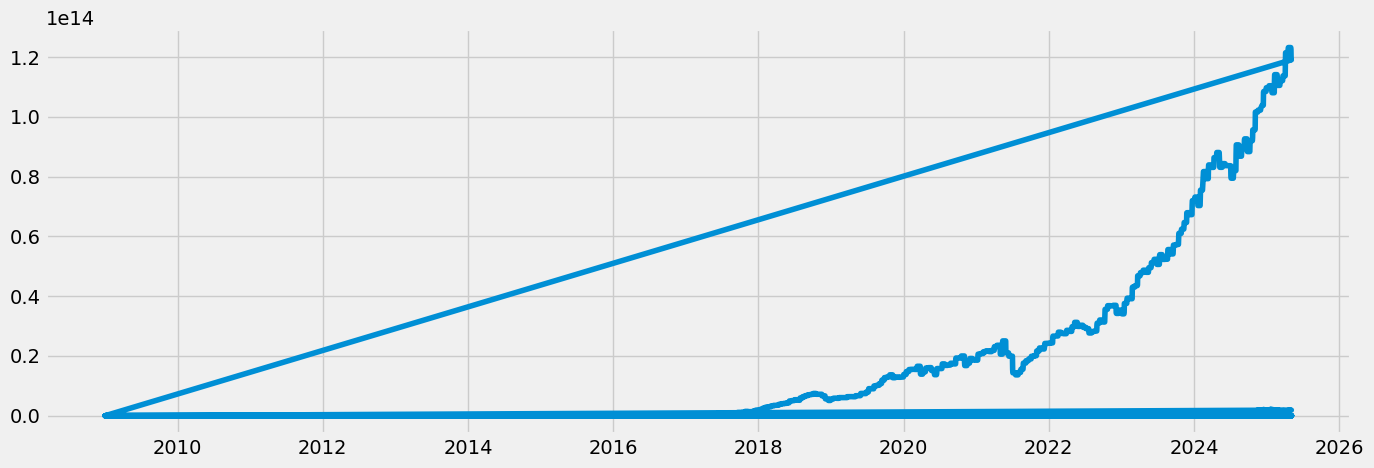

In [101]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(bc)

### 2. Subsetting, wrangling, and cleaning time-series data

In [113]:
# Reset the index to use Date column as filter

bc2 = bc.reset_index()

In [115]:
bc2.head()

,date,value
0,2016-07-17,60.5821
1,2016-07-16,93.1541
2,2016-07-15,76.3548
3,2016-07-14,86.4739
4,2016-07-13,39.4733


In [117]:
data_sub = bc2.loc[(bc2['date'] >= '2010-01-01') & (bc2['date'] < '2020-01-01')]

In [119]:
data_sub.shape

(110017, 2)

In [121]:
data_sub.head()

,date,value
0,2016-07-17,60.5821
1,2016-07-16,93.1541
2,2016-07-15,76.3548
3,2016-07-14,86.4739
4,2016-07-13,39.4733


#### Further up in the task I had to set the index to be "date" as it was considered a column and the plot wouldn't work. I then had to reset the index once I subset it.

In [124]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,value
datetime,
2016-07-17,60.5821
2016-07-16,93.1541
2016-07-15,76.3548
2016-07-14,86.4739
2016-07-13,39.4733


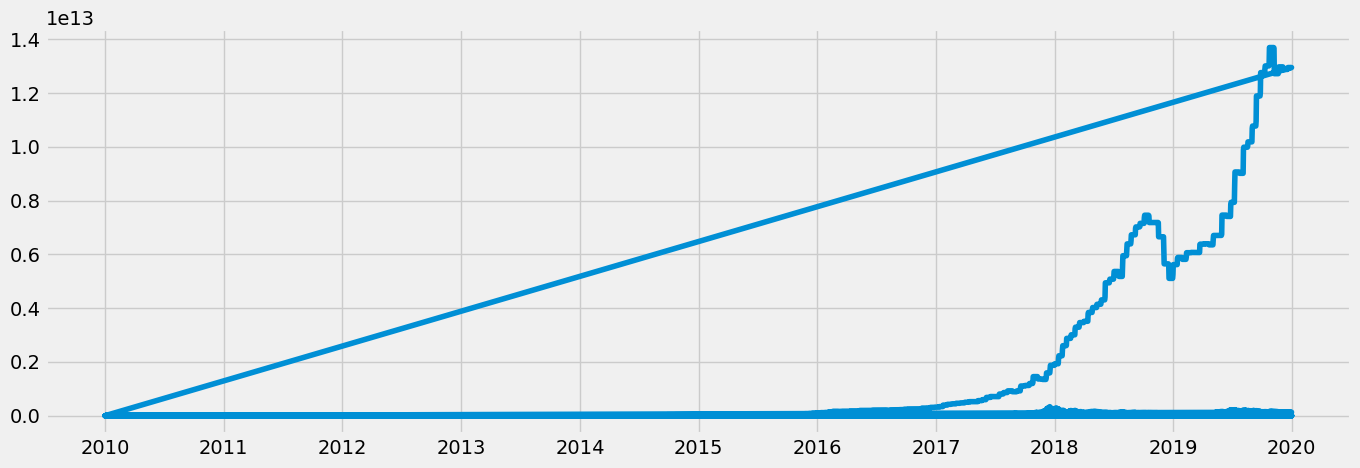

In [126]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

#### I'm not completely sure what's going on with this plot. I think it would have something to do with having mulitple plots that are similar and run very close together. I later removed duplicates and that didn't resolve the problem.

In [129]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

value    0
dtype: int64

In [131]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

21111

In [133]:
data_sub.shape

(110017, 1)

In [135]:
data_sub_clean = data_sub.drop_duplicates()

In [137]:
data_sub_clean.shape

(88906, 1)

In [139]:
data_sub_clean.head()

,value
datetime,
2016-07-17,60.5821
2016-07-16,93.1541
2016-07-15,76.3548
2016-07-14,86.4739
2016-07-13,39.4733


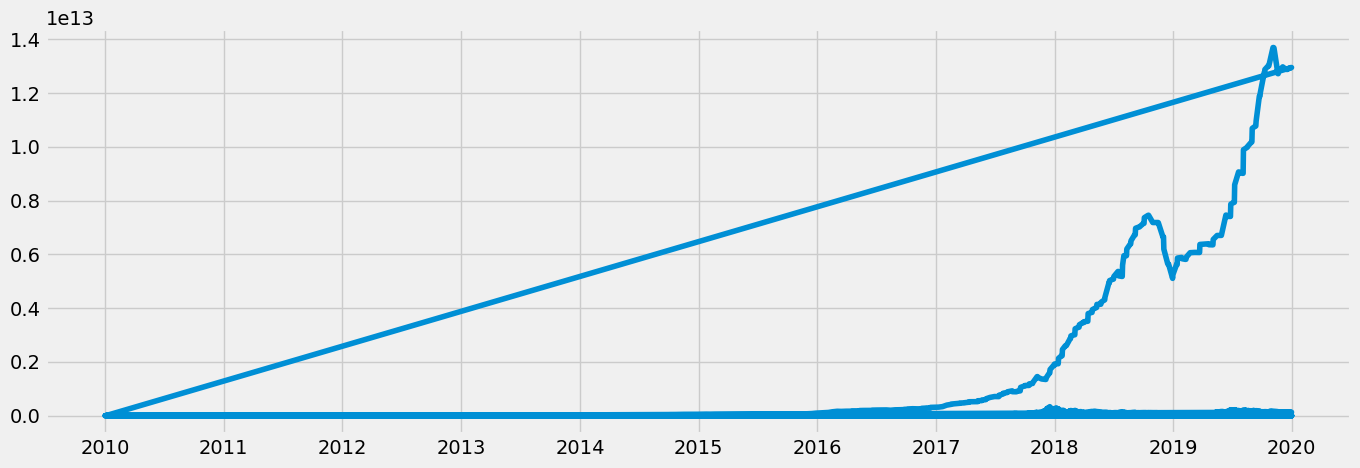

In [145]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_clean)
plt.savefig("Plotting Bitcoin DF - No dups.png")

### 3 Time-Series Analysis: decomposition

In [148]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_clean, model='additive', period=7)

In [150]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

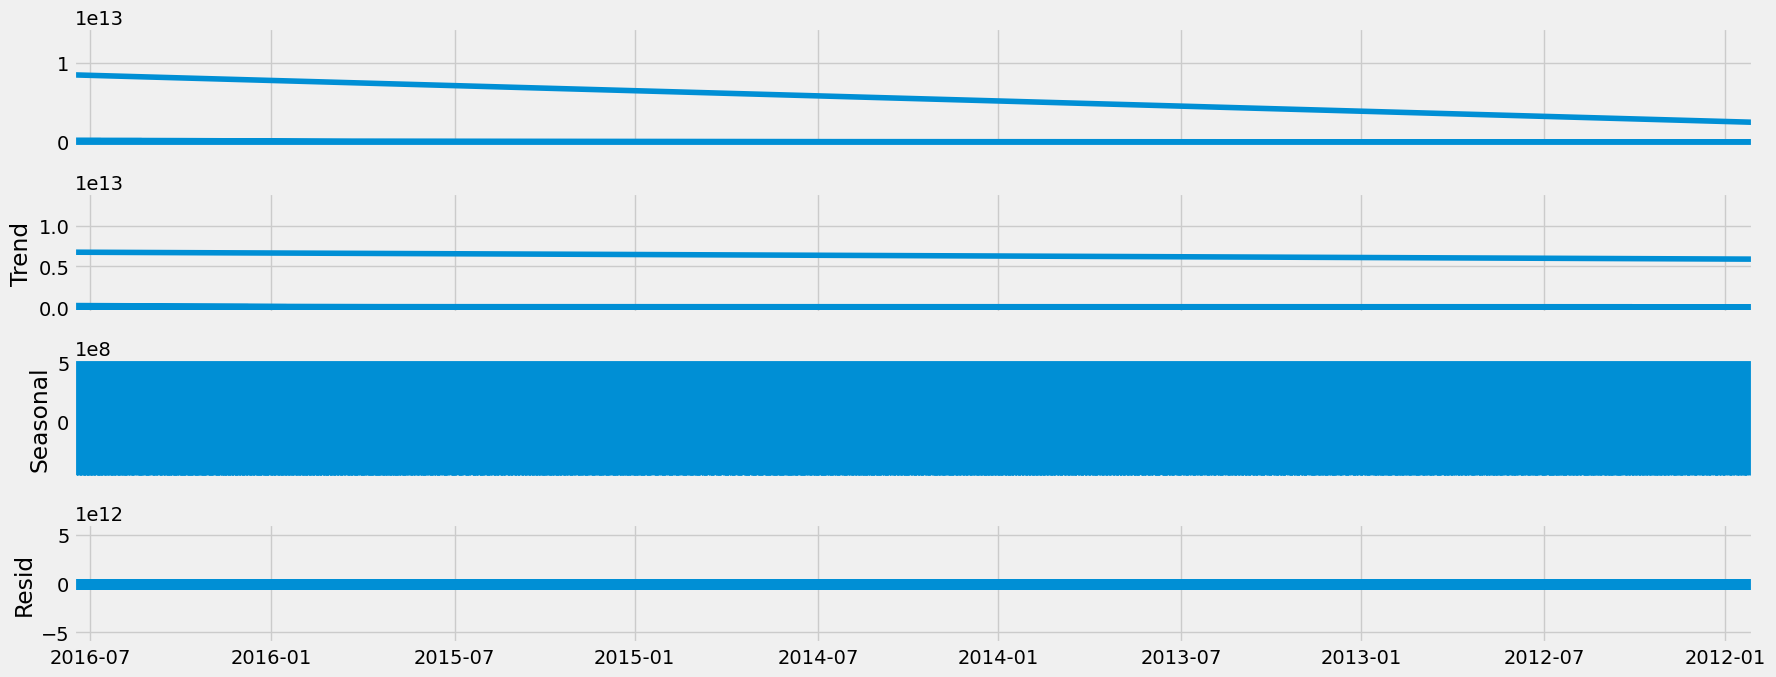

<Figure size 1800x700 with 0 Axes>

In [154]:
# Plot the separate components

decomposition.plot()
plt.show()
plt.savefig("Decomposition Plot.png")

### 4. Testing for stationarity

In [157]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_clean['value'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.729194e+01
p-value                        5.697455e-30
Number of Lags Used            6.300000e+01
Number of Observations Used    8.884200e+04
Critical Value (1%)           -3.430424e+00
Critical Value (5%)           -2.861573e+00
Critical Value (10%)          -2.566787e+00
dtype: float64


#### With the Dickey Fuller statistic my test statistic is -1.729 and my critical value (1%) is at -3.430 and my critical value (5%) is -2.861. This indicates to me that both my critical values are much smaller than my test statistic which means I can't regect the null hypothesis and that there is a unit root in my data. I also have a p-value of 5.69 which my ideal number woul dbe anything less than 0.05. In this case my p-value is much higher than 0.05 indicating that not significant.

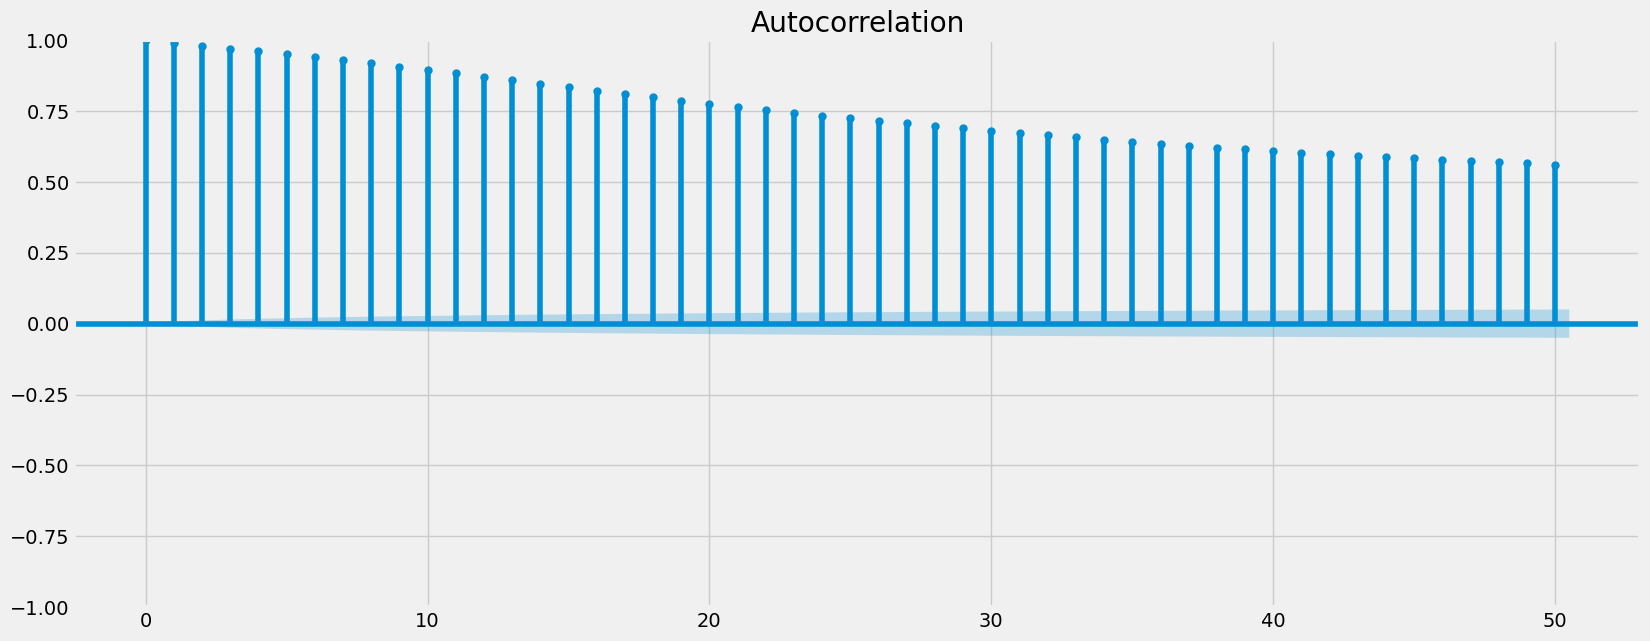

<Figure size 1800x700 with 0 Axes>

In [160]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_clean)
plt.show()
plt.savefig("Autocorrelations.png")

### 5. Stationarizing the Bitcoin Data Insights

In [163]:
data_diff = data_sub_clean - data_sub_clean.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [165]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [167]:
data_diff.head()

,value
datetime,
2016-07-16,32.5720
2016-07-15,-16.7993
2016-07-14,10.1191
2016-07-13,-47.0006
2016-07-12,17.5366


In [169]:
data_diff.columns

Index(['value'], dtype='object')

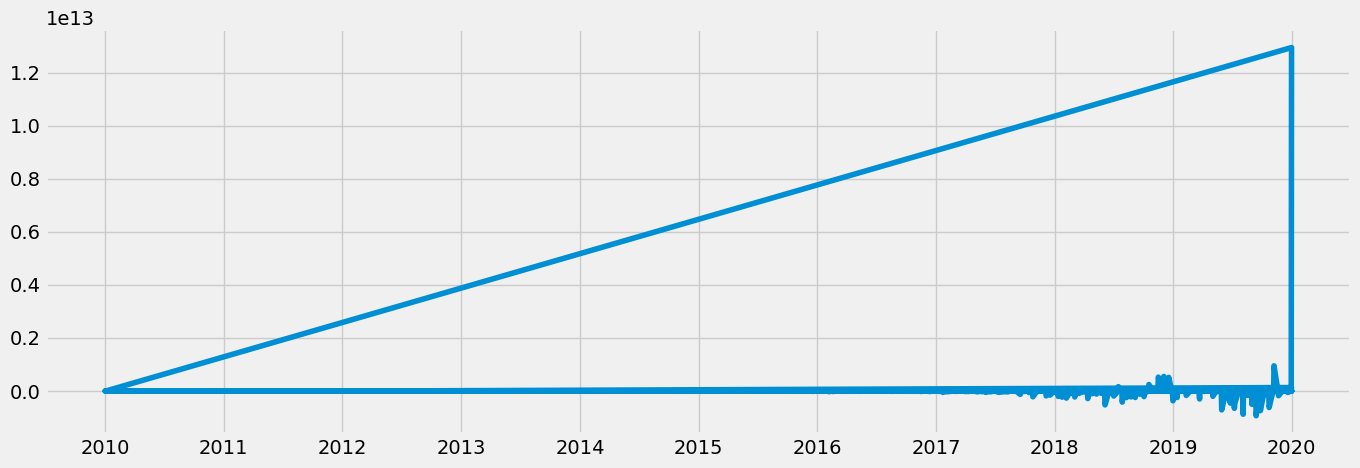

In [171]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)
plt.savefig("Differencing.png")

In [173]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -45.523078
p-value                            0.000000
Number of Lags Used               66.000000
Number of Observations Used    88838.000000
Critical Value (1%)               -3.430424
Critical Value (5%)               -2.861573
Critical Value (10%)              -2.566787
dtype: float64


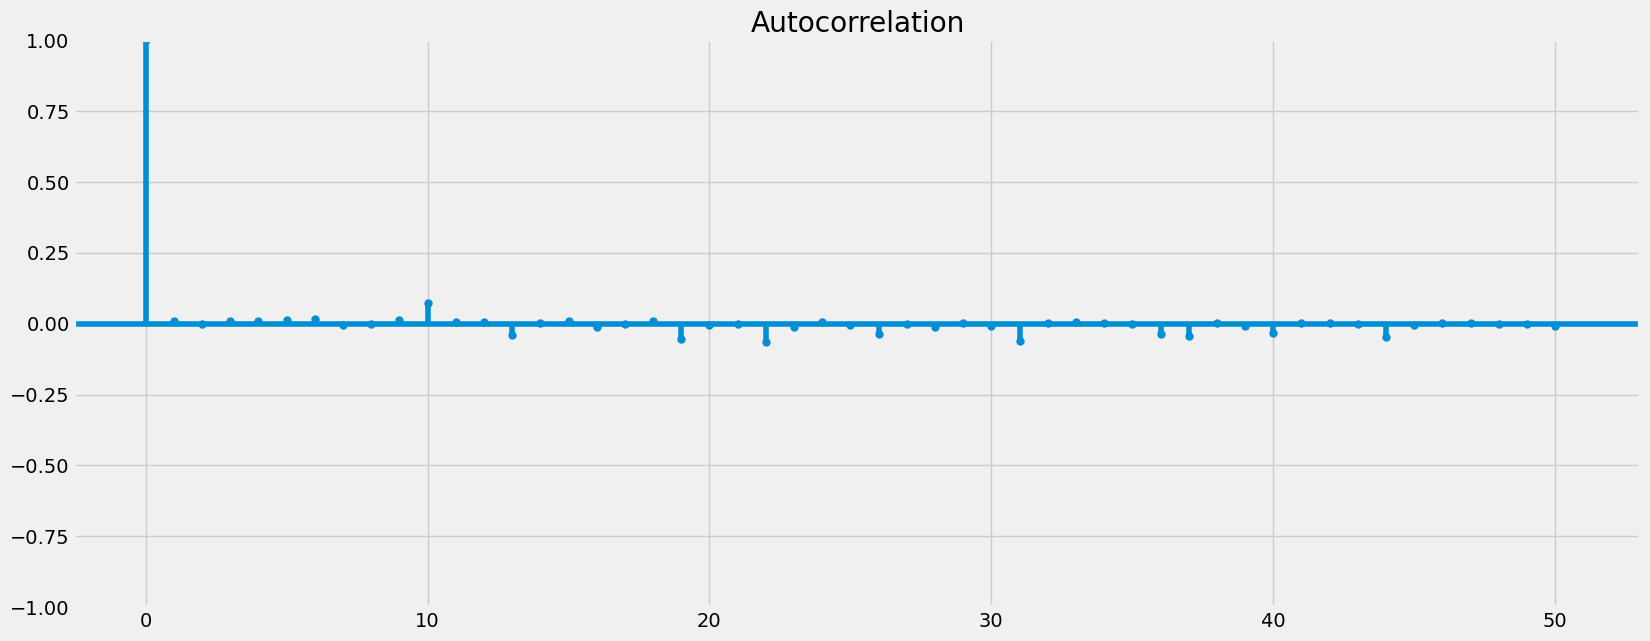

<Figure size 1800x700 with 0 Axes>

In [174]:
plot_acf(data_diff)
plt.show()
plt.savefig("Dickey-Fuller Test.png")

#### I've only performed 1 round of differencing on my data set and the values have gotten significantly worse. I believe if I conduct another round of differencing my data will be even worse and even more inconclusive. 

### 6. Export

In [183]:
data_diff.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bitcoin_timeseries_6.6.pkl'))